# KModes clustering on bank marketing data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings('ignore')

In [97]:
# reading file
bank_df=pd.read_csv("bankmarketing.csv")
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [98]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [99]:
# filtering customer information from bank data
bank_cust_df=bank_df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
bank_cust_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [100]:
def  categorizer(x):
    x=int(int(x/10)*10)
    y=str(x)+"-"+str(x+10)
    return y

bank_cust_df['age_bin']=bank_cust_df['age'].apply(categorizer)
bank_cust_df=bank_cust_df.drop('age',axis=1)
bank_cust_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40-50
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [101]:
bank_cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  age_bin      41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [102]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_cust_df=bank_cust_df.apply(le.fit_transform)
bank_cust_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,3
4,7,1,3,0,0,2,1,6,1,1,4


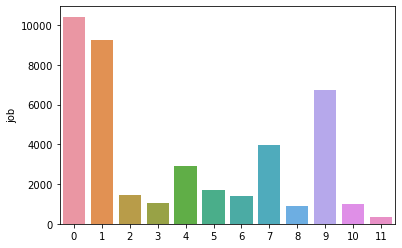

In [103]:
# checking count per category
job_df=pd.DataFrame(bank_cust_df['job'].value_counts())
sns.barplot(x=job_df.index,y=job_df['job'])

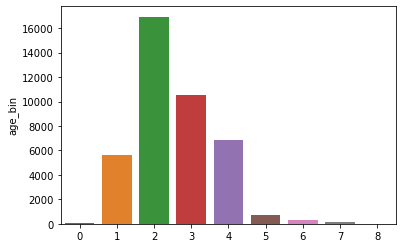

In [104]:
# checking count per age group
age_df=pd.DataFrame(bank_cust_df['age_bin'].value_counts())
sns.barplot(x=age_df.index,y=age_df['age_bin'])

## Using Kmode with "Cao" initialization

In [105]:
km_cao=KModes(n_clusters=2,init='Cao',n_init=1,verbose=1)
fitClusters_cao=km_cao.fit_predict(bank_cust_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6422, cost: 191501.0


In [106]:
#predicted clusters
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [107]:
clusterCentroidsDf=pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns=bank_cust_df.columns
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


## Using Kmodes with "Huang" initialization

In [108]:
km_huang=KModes(n_clusters=1,init="Huang",n_init=1,verbose=1)
fitClusters_huang=km_huang.fit_predict(bank_cust_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216399.0


In [109]:
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

## Choosing K by comparing cost against each K

In [110]:
cost=[]
for i in range(1,5,1):
    kmode=KModes(n_clusters=i,init='Cao',n_init=1,verbose=1)
    kmode.fit_predict(bank_cust_df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216399.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6422, cost: 191501.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5658, cost: 184479.0
Run 1, iteration: 2/100, moves: 1195, cost: 184479.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 7014, cost: 179318.0
Run 1, iteration: 2/100, moves: 1433, cost: 179318.0


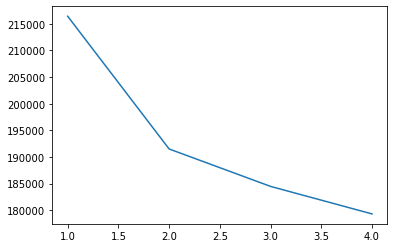

In [111]:
y=[i for i in range(1,5,1)]
plt.plot(y,cost)

In [112]:
# selecting k=2
km_cao=KModes(n_clusters=2,init='Cao',n_init=1,verbose=1)
fitClusters=km_cao.fit_predict(bank_cust_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6422, cost: 191501.0


In [113]:
fitClusters

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

## Combining the predicted cluster with original cluster

In [122]:
bank_cust_df=bank_cust_df.reset_index()
#print(bank_cust_df.head)
bank_cust_df=bank_cust_df.drop(['level_0'],axis=1)
predictedDf=pd.DataFrame(fitClusters)
predictedDf.columns=['Predicted Clusters']
#print(predictedDf.columns)
CombinedDf=pd.concat([bank_cust_df,predictedDf],axis=1).reset_index()
CombinedDf=CombinedDf.drop(['level_0'],axis=1)
CombinedDf.head()

,index,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,Predicted Clusters
0,0,3,1,0,0,0,0,1,6,1,1,4,1
1,1,7,1,3,1,0,0,1,6,1,1,4,1
2,2,7,1,3,0,2,0,1,6,1,1,2,0
3,3,0,1,1,0,0,0,1,6,1,1,3,1
4,4,7,1,3,0,0,2,1,6,1,1,4,1


In [125]:
# dividing as per clusters
cluster1=CombinedDf[CombinedDf['Predicted Clusters']==1]
cluster2=CombinedDf[CombinedDf['Predicted Clusters']==0]
print(cluster1.shape,cluster2.shape)

(12876, 13) (28312, 13)


In [127]:
# checking the count per category for job
job1_df=pd.DataFrame(cluster1['job'].value_counts())
job2_df=pd.DataFrame(cluster2['job'].value_counts())

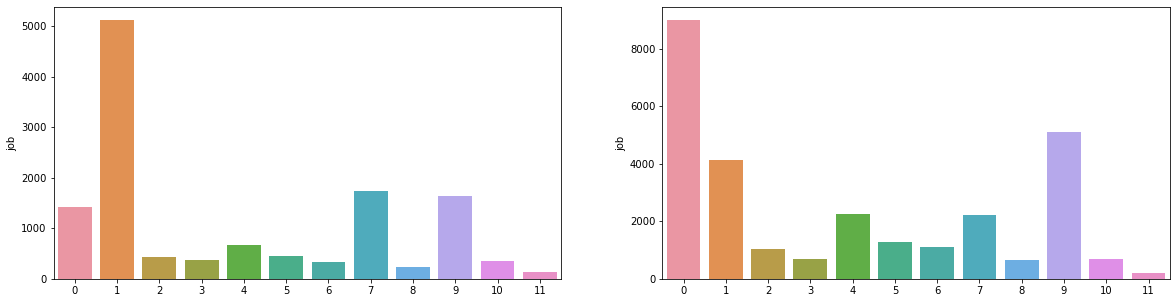

In [128]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=job1_df.index,y=job1_df.job,ax=ax[0])
sns.barplot(x=job2_df.index,y=job2_df.job,ax=ax[1])
fig.show()

In [129]:
# plotting age group wise cluster distribution
age1_df=pd.DataFrame(cluster1.age_bin.value_counts())
age2_df=pd.DataFrame(cluster2.age_bin.value_counts())

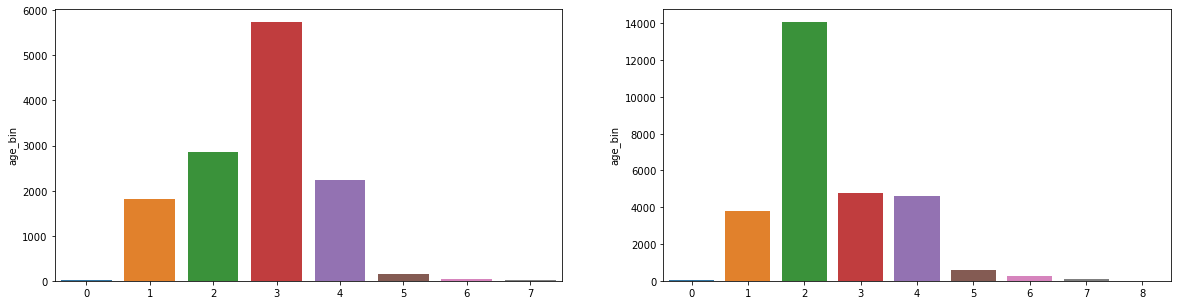

In [131]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age1_df.index,y=age1_df.age_bin,ax=ax[0])
sns.barplot(x=age2_df.index,y=age2_df.age_bin,ax=ax[1])
fig.show()